<span style="color:blue; font-size:24px;">CANCELLATION ANALYSIS</span>


<span style="color:yellow; font-size:20px;">UNDERSTANDING THE DATA</span>


<span style="color:yellow; font-size:20px;">INFO, NULL VALUES, SHAPE </span>


In [12]:
import numpy as  np
import pandas as pd
df=pd.read_csv(r'C:\Users\dandu\OneDrive\Desktop\INF_FINAL_PROJ\MILESTONE 1\RAW_DATA\FINAL_FLIGHT_DELAYS_DATA.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  1048575 non-null  object 
 1   AIRLINE                  1048575 non-null  object 
 2   AIRLINE_DOT              1048575 non-null  object 
 3   AIRLINE_CODE             1048575 non-null  object 
 4   DOT_CODE                 1048575 non-null  int64  
 5   FL_NUMBER                1048575 non-null  int64  
 6   ORIGIN                   1048575 non-null  object 
 7   ORIGIN_CITY              1048575 non-null  object 
 8   DEST                     1048575 non-null  object 
 9   DEST_CITY                1048575 non-null  object 
 10  CRS_DEP_TIME             1048575 non-null  int64  
 11  DEP_TIME                 1021527 non-null  float64
 12  DEP_DELAY                1021518 non-null  float64
 13  TAXI_OUT                 1021103 non-null 

In [14]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     27048
DEP_DELAY                    27057
TAXI_OUT                     27472
WHEELS_OFF                   27472
WHEELS_ON                    27866
TAXI_IN                      27866
CRS_ARR_TIME                     0
ARR_TIME                     27866
ARR_DELAY                    30005
CANCELLED                        0
CANCELLATION_CODE          1020978
DIVERTED                         0
CRS_ELAPSED_TIME                 7
ELAPSED_TIME                 30005
AIR_TIME                     30005
DISTANCE                         0
DELAY_DUE_CARRIER           861303
DELAY_DUE_WEATHER   

In [15]:
df.shape[1]

32

In [16]:
df.shape[0]

1048575

<span style="color:yellow; font-size:20px;">DATA CLEANING</span>


<span style="color:yellow; font-size:20px;">DUPLICATES, DATE/TIME FORMAT, DELETE NOISE DATA, HANDLE NULLS(RELATED TO DEPARTURE AND ARRIVAL), PREPROCESSED DATA.</span>

In [17]:
# clean column names
df.columns = df.columns.str.strip()

# check duplicates
df = df.drop_duplicates()


<span style="color:yellow; font-size:20px;">DEPARTURE RELATED CLEANING</span>


In [18]:
def hhmm_to_hhmmstr(x):
    """
    Convert int in HHMM format to HH:MM string.
    Example: 1 -> 00:01, 59 -> 00:59, 100 -> 01:00, 2359 -> 23:59
    """
    if pd.isna(x):
        return np.nan
    x = int(x)
    hh, mm = divmod(x, 100)
    return f"{hh:02d}:{mm:02d}"


In [19]:
df['CRS_DEP_TIME_CLEAN'] = df['CRS_DEP_TIME'].apply(hhmm_to_hhmmstr)


In [20]:
df['DEP_TIME_CLEAN'] = df['DEP_TIME'].apply(lambda x: hhmm_to_hhmmstr(x) if pd.notna(x) else np.nan)


In [21]:
mask_noise = df['DEP_DELAY'].isna() & df['DEP_TIME'].notna()
df = df.drop(df[mask_noise].index)

# now impute remaining with NaN (already NaN)
df['DEP_DELAY_CLEAN'] = df['DEP_DELAY']


In [22]:
mask_noise = df['TAXI_OUT'].isna() & df['DEP_TIME'].notna()
df = df.drop(df[mask_noise].index)

df['TAXI_OUT_CLEAN'] = df['TAXI_OUT']  # keep NaN where genuine


In [23]:
mask_noise = df['WHEELS_OFF'].isna() & df['DEP_TIME'].notna()
df = df.drop(df[mask_noise].index)

df['WHEELS_OFF_CLEAN'] = df['WHEELS_OFF'].apply(lambda x: hhmm_to_hhmmstr(x) if pd.notna(x) else np.nan)


In [24]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,CRS_DEP_TIME_CLEAN,DEP_TIME_CLEAN,DEP_DELAY_CLEAN,TAXI_OUT_CLEAN,WHEELS_OFF_CLEAN
0,01-01-2019,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,345,ATL,"Atlanta, GA",DAB,"Daytona Beach, FL",...,NaN,NaN,NaN,NaN,NaN,09:39,09:35,-4.0,12.0,09:47
1,01-01-2019,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1780,BHM,"Birmingham, AL",MDW,"Chicago, IL",...,NaN,NaN,NaN,NaN,NaN,17:40,NaN,NaN,NaN,NaN
2,01-01-2019,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,438,IAH,"Houston, TX",SEA,"Seattle, WA",...,NaN,NaN,NaN,NaN,NaN,09:35,09:30,-5.0,21.0,09:51
3,01-01-2019,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1674,LAX,"Los Angeles, CA",CLT,"Charlotte, NC",...,NaN,NaN,NaN,NaN,NaN,11:36,11:38,2.0,15.0,11:53
4,01-01-2019,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1283,MDW,"Chicago, IL",LGA,"New York, NY",...,17.0,0.0,2.0,0.0,100.0,17:05,19:02,117.0,31.0,19:33


In [25]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     27048
DEP_DELAY                    27048
TAXI_OUT                     27048
WHEELS_OFF                   27048
WHEELS_ON                    27442
TAXI_IN                      27442
CRS_ARR_TIME                     0
ARR_TIME                     27442
ARR_DELAY                    29581
CANCELLED                        0
CANCELLATION_CODE          1020978
DIVERTED                         0
CRS_ELAPSED_TIME                 7
ELAPSED_TIME                 29581
AIR_TIME                     29581
DISTANCE                         0
DELAY_DUE_CARRIER           860879
DELAY_DUE_WEATHER   

<span style="color:yellow; font-size:20px;">ARRIVAL RELATED CLEANING</span>



In [26]:
def hhmm_to_hhmmstr(x):
    """
    Convert int in HHMM format to HH:MM string.
    Handles: 1 -> 00:01, 59 -> 00:59, 100 -> 01:00, ..., 2359 -> 23:59
    """
    if pd.isna(x):
        return np.nan
    x = int(x)
    hh, mm = divmod(x, 100)
    return f"{hh:02d}:{mm:02d}"


In [27]:
mask_noise = df['WHEELS_ON'].isna() & df['DEP_TIME'].notna()
df = df.drop(df[mask_noise].index)

df['WHEELS_ON_CLEAN'] = df['WHEELS_ON'].apply(lambda x: hhmm_to_hhmmstr(x) if pd.notna(x) else np.nan)


In [28]:
mask_noise = df['TAXI_IN'].isna() & df['DEP_TIME'].notna()
df = df.drop(df[mask_noise].index)

df['TAXI_IN_CLEAN'] = df['TAXI_IN']


In [29]:
mask_noise = df['ARR_TIME'].isna() & df['DEP_TIME'].notna()
df = df.drop(df[mask_noise].index)

df['ARR_TIME_CLEAN'] = df['ARR_TIME'].apply(lambda x: hhmm_to_hhmmstr(x) if pd.notna(x) else np.nan)


In [30]:
mask_noise = df['ARR_DELAY'].isna() & df['DEP_TIME'].notna()
df = df.drop(df[mask_noise].index)

df['ARR_DELAY_CLEAN'] = df['ARR_DELAY']


In [31]:
# Convert CRS_ARR_TIME HHMM → HH:MM
df['CRS_ARR_TIME_CLEAN'] = df['CRS_ARR_TIME'].apply(lambda x: hhmm_to_hhmmstr(x) if pd.notna(x) else np.nan)


In [32]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,CRS_DEP_TIME_CLEAN,DEP_TIME_CLEAN,DEP_DELAY_CLEAN,TAXI_OUT_CLEAN,WHEELS_OFF_CLEAN,WHEELS_ON_CLEAN,TAXI_IN_CLEAN,ARR_TIME_CLEAN,ARR_DELAY_CLEAN,CRS_ARR_TIME_CLEAN
0,01-01-2019,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,345,ATL,"Atlanta, GA",DAB,"Daytona Beach, FL",...,09:39,09:35,-4.0,12.0,09:47,10:41,3.0,10:44,-11.0,10:55
1,01-01-2019,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1780,BHM,"Birmingham, AL",MDW,"Chicago, IL",...,17:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19:25
2,01-01-2019,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,438,IAH,"Houston, TX",SEA,"Seattle, WA",...,09:35,09:30,-5.0,21.0,09:51,12:02,9.0,12:11,-18.0,12:29
3,01-01-2019,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1674,LAX,"Los Angeles, CA",CLT,"Charlotte, NC",...,11:36,11:38,2.0,15.0,11:53,18:56,16.0,19:12,-3.0,19:15
4,01-01-2019,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1283,MDW,"Chicago, IL",LGA,"New York, NY",...,17:05,19:02,117.0,31.0,19:33,21:54,5.0,21:59,119.0,20:00


In [33]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     27048
DEP_DELAY                    27048
TAXI_OUT                     27048
WHEELS_OFF                   27048
WHEELS_ON                    27048
TAXI_IN                      27048
CRS_ARR_TIME                     0
ARR_TIME                     27048
ARR_DELAY                    27048
CANCELLED                        0
CANCELLATION_CODE          1018570
DIVERTED                         0
CRS_ELAPSED_TIME                 7
ELAPSED_TIME                 27048
AIR_TIME                     27048
DISTANCE                         0
DELAY_DUE_CARRIER           858346
DELAY_DUE_WEATHER   

<span style="color:yellow; font-size:20px;">DROPPING OLD DATA AFTER MAKING NEW CRCTED COLS</span>



In [34]:
# List of original columns to drop
cols_to_drop = [
    'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
    'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY'
]

# Drop them from the DataFrame
df = df.drop(columns=cols_to_drop)




In [35]:
df.shape[0]

1045618

In [36]:
df.shape[1]

32

In [37]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CANCELLED                        0
CANCELLATION_CODE          1018570
DIVERTED                         0
CRS_ELAPSED_TIME                 7
ELAPSED_TIME                 27048
AIR_TIME                     27048
DISTANCE                         0
DELAY_DUE_CARRIER           858346
DELAY_DUE_WEATHER           858346
DELAY_DUE_NAS               858346
DELAY_DUE_SECURITY          858346
DELAY_DUE_LATE_AIRCRAFT     858346
CRS_DEP_TIME_CLEAN               0
DEP_TIME_CLEAN               27048
DEP_DELAY_CLEAN              27048
TAXI_OUT_CLEAN               27048
WHEELS_OFF_CLEAN             27048
WHEELS_ON_CLEAN              27048
TAXI_IN_CLEAN       

<span style="color:yellow; font-size:20px;">IMPUTATION</span>



In [38]:
import numpy as np

# 1️⃣ CANCELLATION_CODE: replace blanks / NaN with 'N'
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].replace('', 'N').fillna('N')

# 2️⃣ ELAPSED_TIME and AIR_TIME: keep NaN where missing
# (no imputation, just ensure column exists)
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].replace({0: np.nan})
df['AIR_TIME'] = df['AIR_TIME'].replace({0: np.nan})

# 3️⃣ Delay due columns: fill NaN with 0
delay_due_cols = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

df[delay_due_cols] = df[delay_due_cols].fillna(0)




In [39]:
df.isnull().sum()

FL_DATE                        0
AIRLINE                        0
AIRLINE_DOT                    0
AIRLINE_CODE                   0
DOT_CODE                       0
FL_NUMBER                      0
ORIGIN                         0
ORIGIN_CITY                    0
DEST                           0
DEST_CITY                      0
CANCELLED                      0
CANCELLATION_CODE              0
DIVERTED                       0
CRS_ELAPSED_TIME               7
ELAPSED_TIME               27048
AIR_TIME                   27048
DISTANCE                       0
DELAY_DUE_CARRIER              0
DELAY_DUE_WEATHER              0
DELAY_DUE_NAS                  0
DELAY_DUE_SECURITY             0
DELAY_DUE_LATE_AIRCRAFT        0
CRS_DEP_TIME_CLEAN             0
DEP_TIME_CLEAN             27048
DEP_DELAY_CLEAN            27048
TAXI_OUT_CLEAN             27048
WHEELS_OFF_CLEAN           27048
WHEELS_ON_CLEAN            27048
TAXI_IN_CLEAN              27048
ARR_TIME_CLEAN             27048
ARR_DELAY_

<span style="color:yellow; font-size:20px;">FEATURE EXTRACTION(DAY, HOUR, ROUTE)</span>



In [40]:
#MONTH AND DAY OF WEEK
# Convert FL_DATE to datetime, letting pandas infer the format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce', dayfirst=True)

# Check for rows that failed to parse
invalid_dates = df[df['FL_DATE'].isna()]
print("Rows with invalid dates:", invalid_dates)

Rows with invalid dates: Empty DataFrame
Columns: [FL_DATE, AIRLINE, AIRLINE_DOT, AIRLINE_CODE, DOT_CODE, FL_NUMBER, ORIGIN, ORIGIN_CITY, DEST, DEST_CITY, CANCELLED, CANCELLATION_CODE, DIVERTED, CRS_ELAPSED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT, CRS_DEP_TIME_CLEAN, DEP_TIME_CLEAN, DEP_DELAY_CLEAN, TAXI_OUT_CLEAN, WHEELS_OFF_CLEAN, WHEELS_ON_CLEAN, TAXI_IN_CLEAN, ARR_TIME_CLEAN, ARR_DELAY_CLEAN, CRS_ARR_TIME_CLEAN]
Index: []

[0 rows x 32 columns]


In [41]:
# Extract Month and Day of Week
df['MONTH'] = df['FL_DATE'].dt.month
df['DAY_OF_WEEK'] = df['FL_DATE'].dt.dayofweek  # 0=Monday
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DEP_DELAY_CLEAN,TAXI_OUT_CLEAN,WHEELS_OFF_CLEAN,WHEELS_ON_CLEAN,TAXI_IN_CLEAN,ARR_TIME_CLEAN,ARR_DELAY_CLEAN,CRS_ARR_TIME_CLEAN,MONTH,DAY_OF_WEEK
0,2019-01-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,345,ATL,"Atlanta, GA",DAB,"Daytona Beach, FL",...,-4.0,12.0,09:47,10:41,3.0,10:44,-11.0,10:55,1,1
1,2019-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1780,BHM,"Birmingham, AL",MDW,"Chicago, IL",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19:25,1,1
2,2019-01-01,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,438,IAH,"Houston, TX",SEA,"Seattle, WA",...,-5.0,21.0,09:51,12:02,9.0,12:11,-18.0,12:29,1,1
3,2019-01-01,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1674,LAX,"Los Angeles, CA",CLT,"Charlotte, NC",...,2.0,15.0,11:53,18:56,16.0,19:12,-3.0,19:15,1,1
4,2019-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1283,MDW,"Chicago, IL",LGA,"New York, NY",...,117.0,31.0,19:33,21:54,5.0,21:59,119.0,20:00,1,1


In [42]:
#ROUTE
# Create Route as ORIGIN-DEST
df['Route'] = df['ORIGIN'] + '-' + df['DEST']

# Check the first few rows
print(df[['ORIGIN', 'DEST', 'Route']].head())


  ORIGIN DEST    Route
0    ATL  DAB  ATL-DAB
1    BHM  MDW  BHM-MDW
2    IAH  SEA  IAH-SEA
3    LAX  CLT  LAX-CLT
4    MDW  LGA  MDW-LGA


In [43]:
df.shape[0]

1045618

In [44]:
df.shape[1]

35

In [45]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,TAXI_OUT_CLEAN,WHEELS_OFF_CLEAN,WHEELS_ON_CLEAN,TAXI_IN_CLEAN,ARR_TIME_CLEAN,ARR_DELAY_CLEAN,CRS_ARR_TIME_CLEAN,MONTH,DAY_OF_WEEK,Route
0,2019-01-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,345,ATL,"Atlanta, GA",DAB,"Daytona Beach, FL",...,12.0,09:47,10:41,3.0,10:44,-11.0,10:55,1,1,ATL-DAB
1,2019-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1780,BHM,"Birmingham, AL",MDW,"Chicago, IL",...,NaN,NaN,NaN,NaN,NaN,NaN,19:25,1,1,BHM-MDW
2,2019-01-01,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,438,IAH,"Houston, TX",SEA,"Seattle, WA",...,21.0,09:51,12:02,9.0,12:11,-18.0,12:29,1,1,IAH-SEA
3,2019-01-01,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1674,LAX,"Los Angeles, CA",CLT,"Charlotte, NC",...,15.0,11:53,18:56,16.0,19:12,-3.0,19:15,1,1,LAX-CLT
4,2019-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1283,MDW,"Chicago, IL",LGA,"New York, NY",...,31.0,19:33,21:54,5.0,21:59,119.0,20:00,1,1,MDW-LGA


In [46]:
df.isnull().sum()

FL_DATE                        0
AIRLINE                        0
AIRLINE_DOT                    0
AIRLINE_CODE                   0
DOT_CODE                       0
FL_NUMBER                      0
ORIGIN                         0
ORIGIN_CITY                    0
DEST                           0
DEST_CITY                      0
CANCELLED                      0
CANCELLATION_CODE              0
DIVERTED                       0
CRS_ELAPSED_TIME               7
ELAPSED_TIME               27048
AIR_TIME                   27048
DISTANCE                       0
DELAY_DUE_CARRIER              0
DELAY_DUE_WEATHER              0
DELAY_DUE_NAS                  0
DELAY_DUE_SECURITY             0
DELAY_DUE_LATE_AIRCRAFT        0
CRS_DEP_TIME_CLEAN             0
DEP_TIME_CLEAN             27048
DEP_DELAY_CLEAN            27048
TAXI_OUT_CLEAN             27048
WHEELS_OFF_CLEAN           27048
WHEELS_ON_CLEAN            27048
TAXI_IN_CLEAN              27048
ARR_TIME_CLEAN             27048
ARR_DELAY_

<span style="color:yellow; font-size:20px;">SAVING</span>



In [47]:
df.to_csv("Preprocessed_data(For Cancellation Analysis).csv", index=False)


<span style="color:yellow; font-size:20px;">FEATURE DICTIONARY</span>



In [48]:
import pandas as pd

# Save the preprocessed dataset
df.to_csv("Preprocessed_data(For Cancellation Analysis).csv", index=False)

# ==========================
# Create feature dictionary
# ==========================
feature_dict = pd.DataFrame({
    'Feature': df.columns,
    'Data_Type': df.dtypes.astype(str),
    'Description': [
        'Flight date (datetime)',
        'Airline name',
        'Airline DOT description',
        'Airline code (IATA)',
        'DOT code (numeric identifier)',
        'Flight number',
        'Origin airport code',
        'Origin city',
        'Destination airport code',
        'Destination city',
        'Cancelled (0=No,1=Yes)',
        'Cancellation code (A/B/C/D/N)',
        'Diverted (0=No,1=Yes)',
        'CRS elapsed time (scheduled)',
        'Elapsed time in minutes (actual, NaN if missing)',
        'Air time in minutes (actual, NaN if missing)',
        'Distance in miles',
        'Delay due to carrier (minutes, 0 if missing)',
        'Delay due to weather (minutes, 0 if missing)',
        'Delay due to NAS (minutes, 0 if missing)',
        'Delay due to security (minutes, 0 if missing)',
        'Delay due to late aircraft (minutes, 0 if missing)',
        'Scheduled departure time (HH:MM)',
        'Actual departure time (HH:MM)',
        'Departure delay (minutes)',
        'Taxi out time (minutes)',
        'Wheels off time (HH:MM)',
        'Wheels on time (HH:MM)',
        'Taxi in time (minutes)',
        'Actual arrival time (HH:MM)',
        'Arrival delay (minutes)',
        'Scheduled arrival time (HH:MM)',
        'Month of flight (1-12)',
        'Day of week (0=Monday,6=Sunday)',
        'Route (Origin-Destination)'
    ]
})

# Save feature dictionary to CSV
feature_dict.to_csv("Feature_Dictionary(For Cancellation Analysis).csv", index=False)
print("Feature dictionary saved as 'Feature_Dictionary(For Cancellation Analysis).csv'")


Feature dictionary saved as 'Feature_Dictionary(For Cancellation Analysis).csv'


<span style="color:yellow; font-size:20px;">UNIVARIATE AND BIVARIATE ANALYSIS</span>



C:\Users\dandu\AppData\Local\Temp\ipykernel_17352\2127134046.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_cancel, x='MONTH', y='CANCELLED', palette='coolwarm')


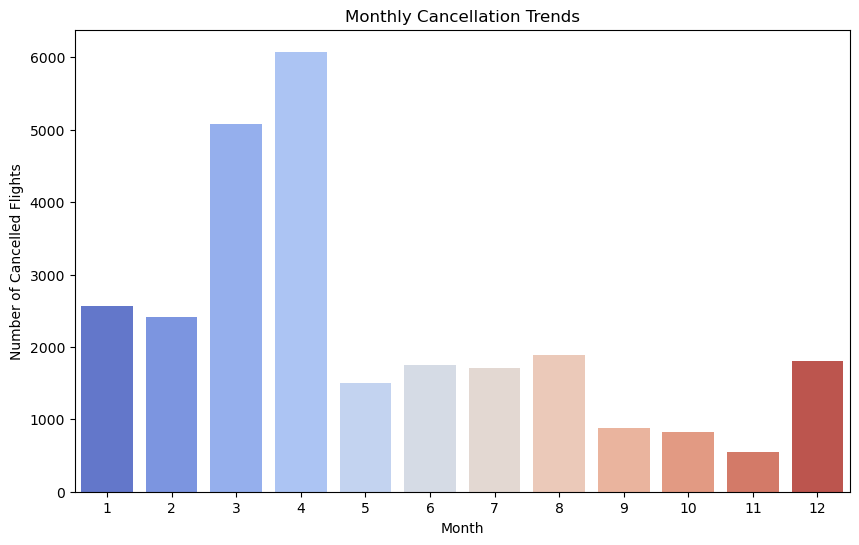

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly cancellation counts
monthly_cancel = df.groupby('MONTH')['CANCELLED'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_cancel, x='MONTH', y='CANCELLED', palette='coolwarm')
plt.title("Monthly Cancellation Trends")
plt.xlabel("Month")
plt.ylabel("Number of Cancelled Flights")
plt.show()


C:\Users\dandu\AppData\Local\Temp\ipykernel_17352\1254344246.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancel_types, x='Cancellation_Type', y='Count', palette='Set2')


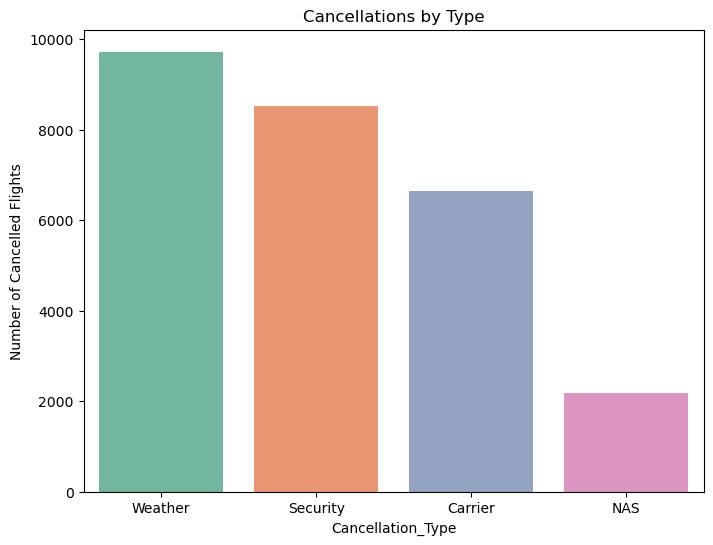

In [50]:
# Count cancellations by type (exclude 'N')
cancel_types = df[df['CANCELLATION_CODE'] != 'N']['CANCELLATION_CODE'].value_counts().reset_index()
cancel_types.columns = ['Cancellation_Type', 'Count']

# Map codes to descriptions
cancel_types['Cancellation_Type'] = cancel_types['Cancellation_Type'].map({
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
})

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=cancel_types, x='Cancellation_Type', y='Count', palette='Set2')
plt.title("Cancellations by Type")
plt.ylabel("Number of Cancelled Flights")
plt.show()


C:\Users\dandu\AppData\Local\Temp\ipykernel_17352\4053691174.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=winter_cancel, x='Period', y='CANCELLED', palette='Blues')


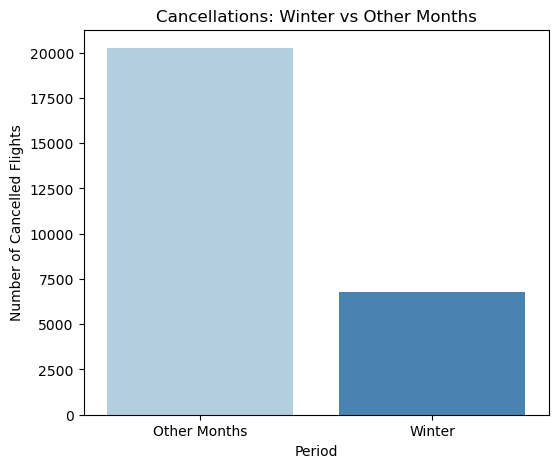

In [51]:
# Define winter months
df['is_winter'] = df['MONTH'].isin([12, 1, 2]).astype(int)

# Total cancellations in winter vs other months
winter_cancel = df.groupby('is_winter')['CANCELLED'].sum().reset_index()
winter_cancel['Period'] = winter_cancel['is_winter'].map({0:'Other Months', 1:'Winter'})

# Plot
plt.figure(figsize=(6,5))
sns.barplot(data=winter_cancel, x='Period', y='CANCELLED', palette='Blues')
plt.title("Cancellations: Winter vs Other Months")
plt.ylabel("Number of Cancelled Flights")
plt.show()


C:\Users\dandu\AppData\Local\Temp\ipykernel_17352\1717622351.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancel_counts, x='Cancellation_Type', y='Number_of_Flights', palette='Set3')


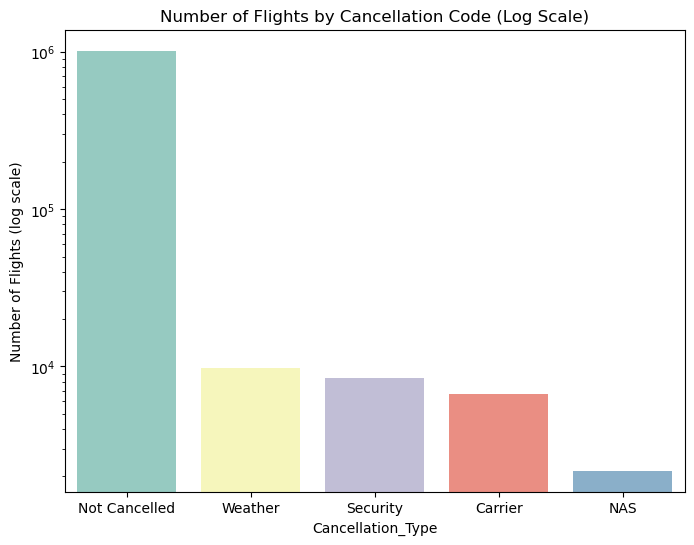

In [52]:
# Map codes to descriptions including 'Not Cancelled'
df['Cancellation_Desc'] = df['CANCELLATION_CODE'].map({
    'A': 'Carrier', 'B': 'Weather', 'C': 'NAS', 'D': 'Security', 'N': 'Not Cancelled'
})

cancel_counts = df['Cancellation_Desc'].value_counts().reset_index()
cancel_counts.columns = ['Cancellation_Type', 'Number_of_Flights']

plt.figure(figsize=(8,6))
sns.barplot(data=cancel_counts, x='Cancellation_Type', y='Number_of_Flights', palette='Set3')
plt.yscale('log')  # log scale
plt.title("Number of Flights by Cancellation Code (Log Scale)")
plt.ylabel("Number of Flights (log scale)")
plt.show()
